In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df=pd.read_csv('data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
df.shape

(1338, 6)

In [4]:
#checking for the null values
for col in df.columns:
    nul_values_count=df[col].isnull().sum()
    print(f'The {col} contains {nul_values_count} null values')

The age contains 0 null values
The sex contains 0 null values
The bmi contains 0 null values
The children contains 0 null values
The smoker contains 0 null values
The region contains 0 null values
The charges contains 0 null values


In [6]:
#we can also check the null values using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
cat_df=df.select_dtypes('object')
num_df=df.select_dtypes(['int','float'])

In [11]:
cat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [12]:
num_df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


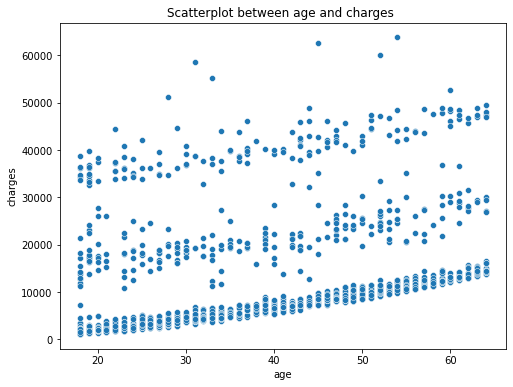

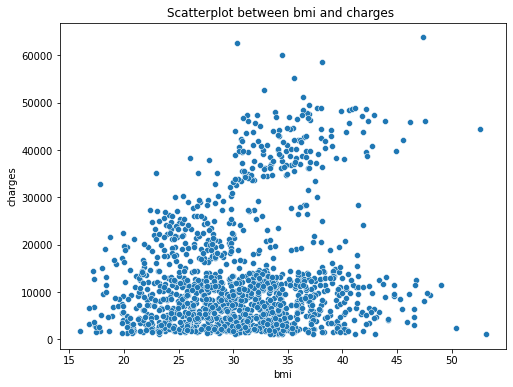

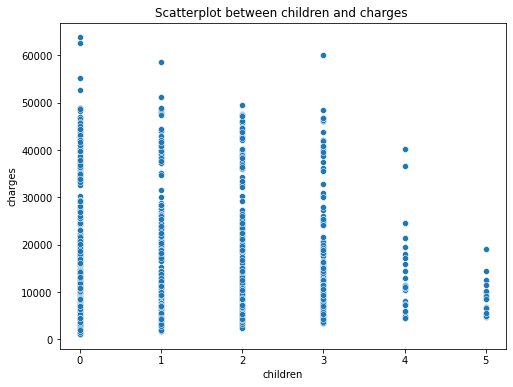

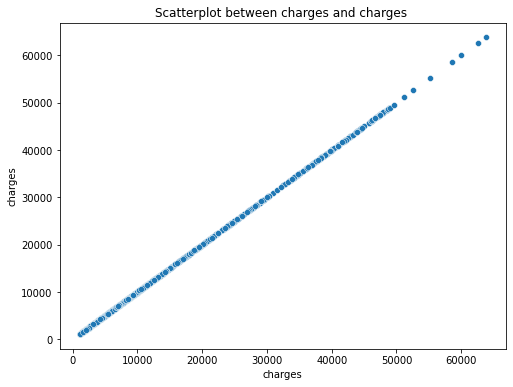

In [15]:
#use scatterplot to identify the outliers
for col in num_df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df,x=col,y='charges')
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.title(f'Scatterplot between {col} and charges ')
    plt.plot()

In [16]:
'''from the above graph we can see that children can be considered as categorical variable
   before conveting into categorical type check the unique values and count for each value'''
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [124]:
#since we have less values for 4 and 5 children cateory lets merge them as 4+
# Function to transform children values
def transform_children(value):
    if value == 0:
        return '0'
    elif value == 1:
        return '1'
    elif value == 2:
        return '2'
    elif value == 3:
        return '3'
    else:
        return '4+'

# Apply the transformation
df['children'] = df['children'].apply(transform_children)

# Convert to categorical datatype
df['children'] = pd.Categorical(df['children'], categories=['0', '1', '2', '3', '4+'], ordered=True)

# Display the DataFrame
print(df.head(),end='/n')
print(df.info())

   age     sex     bmi children smoker     region      charges
0   19  female  27.900        0    yes  southwest  16884.92400
1   18    male  33.770        1     no  southeast   1725.55230
2   28    male  33.000        3     no  southeast   4449.46200
3   33    male  22.705        0     no  northwest  21984.47061
4   32    male  28.880        0     no  northwest   3866.85520/n<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 64.4+ KB
None


In [125]:
cat_df=df.select_dtypes('object')
num_df=df.select_dtypes(['int','float'])

In [34]:

def correct_outliers(value, lower_fence, upper_fence, median):
    if value < lower_fence or value > upper_fence:
        return median
    else:
        return value

for col in num_df.columns:
    quantile_25 = df[col].quantile(0.25)
    quantile_75 = df[col].quantile(0.75)
    iqr = quantile_75 - quantile_25
    lower_fence = quantile_25 - (1.5 * iqr)
    upper_fence = quantile_75 + (1.5 * iqr)
    median = int(np.ceil(df[col].median()))
    
    # Apply the transformation
    df[col] = df[col].apply(lambda x: correct_outliers(x, lower_fence, upper_fence, median))


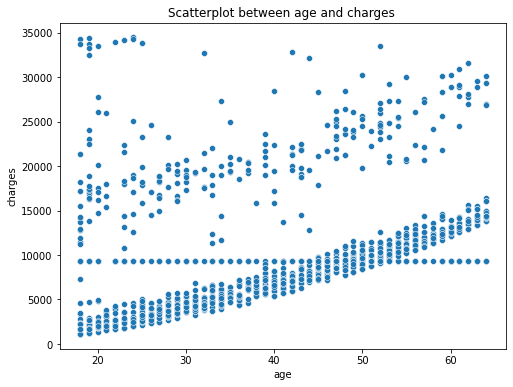

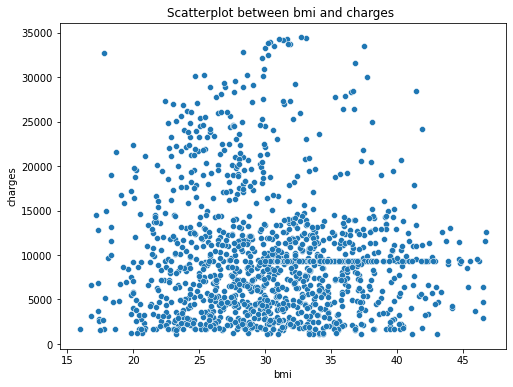

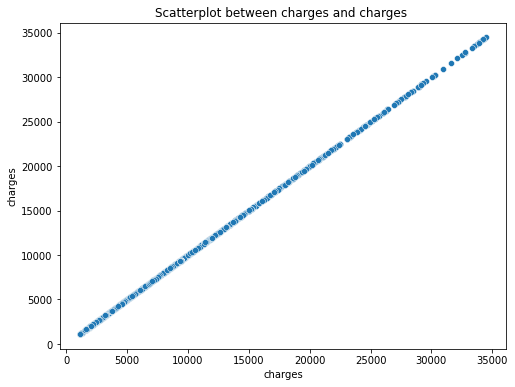

In [35]:
#use scatterplot to identify the outliers
for col in num_df.columns:
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df,x=col,y='charges')
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.title(f'Scatterplot between {col} and charges ')
    plt.plot()

In [37]:
#replacing outlier with median didn't give us better results so skip the step


In [73]:
corr=df[num_df.columns].corr(method='spearman')
corr

,age,bmi,charges
age,1.000000,0.107736,0.534392
bmi,0.107736,1.000000,0.119396
charges,0.534392,0.119396,1.000000


<AxesSubplot:>

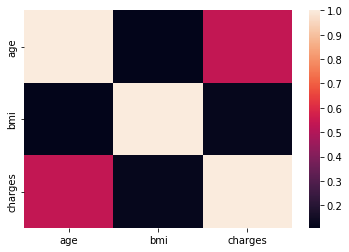

In [74]:
sns.heatmap(corr)

In [51]:
%pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


for col in cat_df.columns:
    # Perform ANOVA
    model = ols(f'charges ~ C({col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value=anova_table['PR(>F)'][0]
    #print(f'anova_table for {col}:\n {anova_table}')
    if p_value<.05:
        print()
        print(f'The {col} has good significant relation with charges with p_value:{p_value}')


The sex has good significant relation with charges with p_value:0.03613272100596256

The smoker has good significant relation with charges with p_value:8.271435842185788e-283

The region has good significant relation with charges with p_value:0.0308933560705201


'''As we can see from all the categorical variables has strong correlation and 
age has from nul cols age has little bit correlation'''


In [77]:
df.drop('bmi',axis=1,inplace=True)

In [126]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='age', ylabel='Count'>

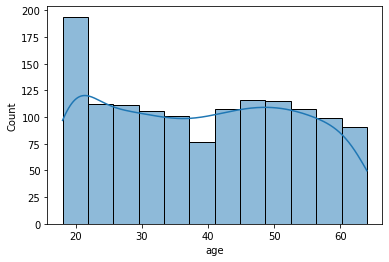

In [83]:
sns.histplot(df,x='age',kde=True)

In [127]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
age_vector = df['age'].values.reshape(-1, 1)
bmi_vector = df['bmi'].values.reshape(-1, 1)
df['age_scaled']=std_scale.fit_transform(age_vector)
df['bmi_scaled']=std_scale.fit_transform(bmi_vector)


In [128]:
df.drop(['age','bmi'],axis=1,inplace=True)

In [129]:
df.head()

,sex,children,smoker,region,charges,age_scaled,bmi_scaled
0,female,0,yes,southwest,16884.92400,-1.438764,-0.453320
1,male,1,no,southeast,1725.55230,-1.509965,0.509621
2,male,3,no,southeast,4449.46200,-0.797954,0.383307
3,male,0,no,northwest,21984.47061,-0.441948,-1.305531
4,male,0,no,northwest,3866.85520,-0.513149,-0.292556


In [130]:
from sklearn.preprocessing import LabelEncoder
# One-Hot Encoding for multiple variables
encoded_df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)


In [131]:
encoded_df.head()

,children,charges,age_scaled,bmi_scaled,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,16884.92400,-1.438764,-0.453320,0,1,0,0,1
1,1,1725.55230,-1.509965,0.509621,1,0,0,1,0
2,3,4449.46200,-0.797954,0.383307,1,0,0,1,0
3,0,21984.47061,-0.441948,-1.305531,1,0,1,0,0
4,0,3866.85520,-0.513149,-0.292556,1,0,1,0,0


In [132]:

# Label Encoding for a single variable
label_encoder = LabelEncoder()
encoded_df['children_encoded'] = label_encoder.fit_transform(df['children'])


In [133]:
encoded_df.drop('children',axis=1,inplace=True)

In [134]:
encoded_df.head()

,charges,age_scaled,bmi_scaled,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_encoded
0,16884.92400,-1.438764,-0.453320,0,1,0,0,1,0
1,1725.55230,-1.509965,0.509621,1,0,0,1,0,1
2,4449.46200,-0.797954,0.383307,1,0,0,1,0,3
3,21984.47061,-0.441948,-1.305531,1,0,1,0,0,0
4,3866.85520,-0.513149,-0.292556,1,0,1,0,0,0


In [135]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   charges           1338 non-null   float64
 1   age_scaled        1338 non-null   float64
 2   bmi_scaled        1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   smoker_yes        1338 non-null   uint8  
 5   region_northwest  1338 non-null   uint8  
 6   region_southeast  1338 non-null   uint8  
 7   region_southwest  1338 non-null   uint8  
 8   children_encoded  1338 non-null   int64  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 48.5 KB


In [136]:
x=encoded_df.iloc[:,1:]
y=encoded_df.iloc[:,0]

In [137]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [138]:
x.head()

,age_scaled,bmi_scaled,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_encoded
0,-1.438764,-0.453320,0,1,0,0,1,0
1,-1.509965,0.509621,1,0,0,1,0,1
2,-0.797954,0.383307,1,0,0,1,0,3
3,-0.441948,-1.305531,1,0,1,0,0,0
4,-0.513149,-0.292556,1,0,1,0,0,0


In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [140]:
print(f'the x_train shape: {x_train.shape}')
print(f'the x_test shape: {x_test.shape}')
print(f'the y_train shape: {y_train.shape}')
print(f'the y_test shape: {y_test.shape}')


the x_train shape: (1070, 8)
the x_test shape: (268, 8)
the y_train shape: (1070,)
the y_test shape: (268,)


In [141]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [142]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [143]:
from sklearn.metrics import r2_score
print(f'The training score is :{r2_score(y_train,y_pred_train)}' )
print(f'The testing score is :{r2_score(y_test,y_pred_test)}' )

The training score is :0.7478226178757672
The testing score is :0.7625868573320386
